# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 50:
Image - Min Value: 23 Max Value: 244
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


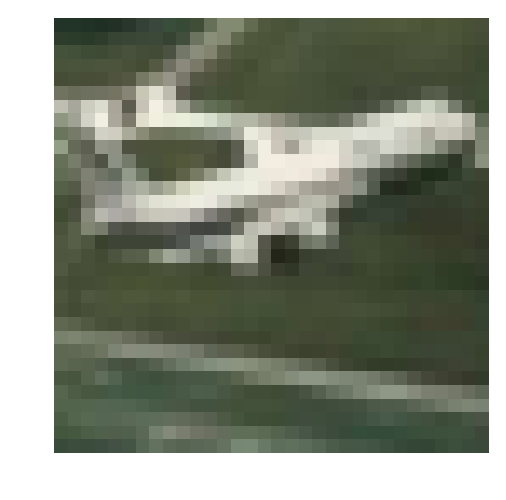

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 50
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [5]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    
    # Calculating min-max normalization
    # x' = ( x - x_min ) / ( x_max - x_min)
    
    x_normalized = list()
    x_min = np.min(x) # x_min
    x_max = np.max(x) # x_max
    
    for i in x:
        x_normalized.append( ( i - x_min ) / ( x_max - x_min ) )
    
    return np.array(x_normalized)



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [6]:
from sklearn.preprocessing import OneHotEncoder
map_one_hot = {}
def one_hot_encode(x):
    
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """

    oneHot = OneHotEncoder(n_values=10)
    
    labels = np.array(x).reshape(len(x),1)
    oneHot.fit(labels)
    y = oneHot.transform(labels).toarray()
    return y

tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [36]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    ph = tf.placeholder(shape=(None,image_shape[0],image_shape[1],image_shape[2]),name='x',dtype=tf.float32)
    return ph


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    ph = tf.placeholder(shape=(None,n_classes),name='y',dtype=tf.float32)
    return ph


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    ph = tf.placeholder(name='keep_prob',dtype=tf.float32)
    return ph


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [37]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    weight = tf.Variable(tf.random_normal(
                [conv_ksize[0], conv_ksize[1], int(x_tensor.shape[3]), conv_num_outputs], stddev=0.1))
        
    bias = tf.Variable(tf.random_normal([conv_num_outputs], stddev=0.1))
    
    # filter: A Tensor. Must have the same type as input. A 4-D tensor of 
    # shape [filter_height, filter_width, in_channels, out_channels]
    
    # strides: A list of ints. 1-D tensor of length 4. The stride of 
    # the sliding window for each dimension of input. 
    # The dimension order is determined by the value of data_format, see below for details.
    conv_layer = tf.nn.conv2d(x_tensor,
                             filter=weight,
                             strides=[1,conv_strides[0],conv_strides[1],1],
                             padding='SAME',
                             name='conv_1l')
    
    conv_layer = tf.nn.bias_add(conv_layer, bias, name='bias_2l')    
    
    activation = tf.nn.relu(conv_layer,name='act_3l')
    
    maxpool = tf.nn.max_pool(activation,
                             ksize=[1,pool_ksize[0],pool_ksize[1],1],
                             strides=[1,pool_strides[0],pool_strides[1],1],
                             padding='SAME',
                             name= 'maxp_4l')
    return maxpool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [38]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    return tf.contrib.layers.flatten(x_tensor)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [39]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs,activation_fn=tf.nn.relu)    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [40]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs)
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [44]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    # Parameters
    
    conv_ksize = (8, 8)
    conv_strides = (conv_ksize[0]/2, conv_ksize[1]/2)
    conv_num_outputs = conv_ksize[0] * conv_ksize[1]
    pool_ksize = (conv_strides[0], conv_strides[1])
    pool_strides = (pool_ksize[0]/2, pool_ksize[1]/2)
    num_outputs = 10

    # Network
    
    conv_l1 = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv_l2 = conv2d_maxpool(conv_l1, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv_l3 = conv2d_maxpool(conv_l2, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    flat = flatten(conv_l3)
    flat = tf.nn.dropout(flat, keep_prob)
        
    fully_conn_layer = fully_conn(flat, 100)
    fully_conn_layer = tf.nn.dropout(fully_conn_layer, keep_prob)
    
    output_layer = output(fully_conn_layer, num_outputs)
    
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [45]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [46]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(cost, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: 1.})
    
    valid_acc = session.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                loss,
                100* valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [47]:
# TODO: Tune Parameters
epochs = 200
batch_size = 512
keep_probability = .8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [48]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.2410 Validation Accuracy: 22.779998
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.0683 Validation Accuracy: 28.679997
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.9470 Validation Accuracy: 31.999999
Epoch  4, CIFAR-10 Batch 1:  Loss:     1.8634 Validation Accuracy: 37.059999
Epoch  5, CIFAR-10 Batch 1:  Loss:     1.7702 Validation Accuracy: 38.439998
Epoch  6, CIFAR-10 Batch 1:  Loss:     1.6821 Validation Accuracy: 40.839997
Epoch  7, CIFAR-10 Batch 1:  Loss:     1.6310 Validation Accuracy: 40.379995
Epoch  8, CIFAR-10 Batch 1:  Loss:     1.5508 Validation Accuracy: 44.000000
Epoch  9, CIFAR-10 Batch 1:  Loss:     1.4845 Validation Accuracy: 44.099995
Epoch 10, CIFAR-10 Batch 1:  Loss:     1.4410 Validation Accuracy: 45.299998
Epoch 11, CIFAR-10 Batch 1:  Loss:     1.3889 Validation Accuracy: 45.559993
Epoch 12, CIFAR-10 Batch 1:  Loss:     1.3798 Validation Accuracy: 46.099997
Epoch 13, CIFAR-10 Batch 1:  Loss

Epoch 107, CIFAR-10 Batch 1:  Loss:     0.2910 Validation Accuracy: 51.039994
Epoch 108, CIFAR-10 Batch 1:  Loss:     0.3306 Validation Accuracy: 51.639992
Epoch 109, CIFAR-10 Batch 1:  Loss:     0.3312 Validation Accuracy: 50.899994
Epoch 110, CIFAR-10 Batch 1:  Loss:     0.2893 Validation Accuracy: 52.439994
Epoch 111, CIFAR-10 Batch 1:  Loss:     0.2872 Validation Accuracy: 52.019989
Epoch 112, CIFAR-10 Batch 1:  Loss:     0.2786 Validation Accuracy: 51.819992
Epoch 113, CIFAR-10 Batch 1:  Loss:     0.3976 Validation Accuracy: 50.239998
Epoch 114, CIFAR-10 Batch 1:  Loss:     0.3476 Validation Accuracy: 51.339996
Epoch 115, CIFAR-10 Batch 1:  Loss:     0.3191 Validation Accuracy: 50.679994
Epoch 116, CIFAR-10 Batch 1:  Loss:     0.5438 Validation Accuracy: 46.239996
Epoch 117, CIFAR-10 Batch 1:  Loss:     0.3518 Validation Accuracy: 50.459993
Epoch 118, CIFAR-10 Batch 1:  Loss:     0.2618 Validation Accuracy: 51.959997
Epoch 119, CIFAR-10 Batch 1:  Loss:     0.2814 Validation Accura

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [49]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

print('Training...')
with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.2376 Validation Accuracy: 18.479998
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.1506 Validation Accuracy: 25.839999
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.0010 Validation Accuracy: 27.399996
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.8260 Validation Accuracy: 31.959999
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.8049 Validation Accuracy: 35.679999
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.7492 Validation Accuracy: 37.320000
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.6032 Validation Accuracy: 41.599998
Epoch  2, CIFAR-10 Batch 3:  Loss:     1.4854 Validation Accuracy: 41.939998
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.4837 Validation Accuracy: 42.419997
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.5328 Validation Accuracy: 42.199996
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.5635 Validation Accuracy: 43.299994
Epoch  3, CIFAR-10 Batch 2:  Loss:     1.4755 Validation Accuracy: 44.959998
Epoch  3, CIFAR-10 Batch 3:  Loss:     1.3610 Validation Accurac

Epoch 22, CIFAR-10 Batch 3:  Loss:     0.8777 Validation Accuracy: 59.619993
Epoch 22, CIFAR-10 Batch 4:  Loss:     0.8484 Validation Accuracy: 58.599997
Epoch 22, CIFAR-10 Batch 5:  Loss:     0.8830 Validation Accuracy: 58.519995
Epoch 23, CIFAR-10 Batch 1:  Loss:     0.8960 Validation Accuracy: 59.499991
Epoch 23, CIFAR-10 Batch 2:  Loss:     0.9279 Validation Accuracy: 55.979991
Epoch 23, CIFAR-10 Batch 3:  Loss:     0.8605 Validation Accuracy: 59.339994
Epoch 23, CIFAR-10 Batch 4:  Loss:     0.8385 Validation Accuracy: 59.639990
Epoch 23, CIFAR-10 Batch 5:  Loss:     0.8653 Validation Accuracy: 59.039992
Epoch 24, CIFAR-10 Batch 1:  Loss:     0.8958 Validation Accuracy: 59.399992
Epoch 24, CIFAR-10 Batch 2:  Loss:     0.8523 Validation Accuracy: 58.279991
Epoch 24, CIFAR-10 Batch 3:  Loss:     0.8484 Validation Accuracy: 59.479994
Epoch 24, CIFAR-10 Batch 4:  Loss:     0.8485 Validation Accuracy: 59.119987
Epoch 24, CIFAR-10 Batch 5:  Loss:     0.8487 Validation Accuracy: 59.319991

Epoch 43, CIFAR-10 Batch 5:  Loss:     0.6834 Validation Accuracy: 60.479993
Epoch 44, CIFAR-10 Batch 1:  Loss:     0.7393 Validation Accuracy: 59.539992
Epoch 44, CIFAR-10 Batch 2:  Loss:     0.7207 Validation Accuracy: 58.879989
Epoch 44, CIFAR-10 Batch 3:  Loss:     0.6802 Validation Accuracy: 60.179985
Epoch 44, CIFAR-10 Batch 4:  Loss:     0.6452 Validation Accuracy: 60.539991
Epoch 44, CIFAR-10 Batch 5:  Loss:     0.6797 Validation Accuracy: 60.599995
Epoch 45, CIFAR-10 Batch 1:  Loss:     0.7187 Validation Accuracy: 60.659993
Epoch 45, CIFAR-10 Batch 2:  Loss:     0.7058 Validation Accuracy: 58.739996
Epoch 45, CIFAR-10 Batch 3:  Loss:     0.6395 Validation Accuracy: 60.439992
Epoch 45, CIFAR-10 Batch 4:  Loss:     0.6470 Validation Accuracy: 60.219985
Epoch 45, CIFAR-10 Batch 5:  Loss:     0.6694 Validation Accuracy: 60.799992
Epoch 46, CIFAR-10 Batch 1:  Loss:     0.6769 Validation Accuracy: 61.319995
Epoch 46, CIFAR-10 Batch 2:  Loss:     0.6926 Validation Accuracy: 59.879988

Epoch 65, CIFAR-10 Batch 2:  Loss:     0.5798 Validation Accuracy: 59.919989
Epoch 65, CIFAR-10 Batch 3:  Loss:     0.4808 Validation Accuracy: 60.559988
Epoch 65, CIFAR-10 Batch 4:  Loss:     0.5202 Validation Accuracy: 61.819988
Epoch 65, CIFAR-10 Batch 5:  Loss:     0.5789 Validation Accuracy: 60.079998
Epoch 66, CIFAR-10 Batch 1:  Loss:     0.5955 Validation Accuracy: 61.639988
Epoch 66, CIFAR-10 Batch 2:  Loss:     0.5626 Validation Accuracy: 60.119987
Epoch 66, CIFAR-10 Batch 3:  Loss:     0.5089 Validation Accuracy: 60.359991
Epoch 66, CIFAR-10 Batch 4:  Loss:     0.5205 Validation Accuracy: 61.679995
Epoch 66, CIFAR-10 Batch 5:  Loss:     0.5525 Validation Accuracy: 61.659986
Epoch 67, CIFAR-10 Batch 1:  Loss:     0.5857 Validation Accuracy: 60.819989
Epoch 67, CIFAR-10 Batch 2:  Loss:     0.5713 Validation Accuracy: 59.959996
Epoch 67, CIFAR-10 Batch 3:  Loss:     0.4640 Validation Accuracy: 60.559988
Epoch 67, CIFAR-10 Batch 4:  Loss:     0.5110 Validation Accuracy: 61.279994

Epoch 86, CIFAR-10 Batch 4:  Loss:     0.4859 Validation Accuracy: 59.679991
Epoch 86, CIFAR-10 Batch 5:  Loss:     0.5083 Validation Accuracy: 60.999984
Epoch 87, CIFAR-10 Batch 1:  Loss:     0.5134 Validation Accuracy: 61.079991
Epoch 87, CIFAR-10 Batch 2:  Loss:     0.4918 Validation Accuracy: 61.319995
Epoch 87, CIFAR-10 Batch 3:  Loss:     0.4136 Validation Accuracy: 60.279995
Epoch 87, CIFAR-10 Batch 4:  Loss:     0.4756 Validation Accuracy: 60.399985
Epoch 87, CIFAR-10 Batch 5:  Loss:     0.5072 Validation Accuracy: 61.299992
Epoch 88, CIFAR-10 Batch 1:  Loss:     0.5253 Validation Accuracy: 61.179996
Epoch 88, CIFAR-10 Batch 2:  Loss:     0.4951 Validation Accuracy: 61.420000
Epoch 88, CIFAR-10 Batch 3:  Loss:     0.4180 Validation Accuracy: 60.439992
Epoch 88, CIFAR-10 Batch 4:  Loss:     0.4683 Validation Accuracy: 60.279989
Epoch 88, CIFAR-10 Batch 5:  Loss:     0.5007 Validation Accuracy: 61.059988
Epoch 89, CIFAR-10 Batch 1:  Loss:     0.5324 Validation Accuracy: 61.259991

Epoch 107, CIFAR-10 Batch 5:  Loss:     0.5078 Validation Accuracy: 59.639996
Epoch 108, CIFAR-10 Batch 1:  Loss:     0.4903 Validation Accuracy: 61.559999
Epoch 108, CIFAR-10 Batch 2:  Loss:     0.4429 Validation Accuracy: 61.779988
Epoch 108, CIFAR-10 Batch 3:  Loss:     0.3698 Validation Accuracy: 60.939991
Epoch 108, CIFAR-10 Batch 4:  Loss:     0.4560 Validation Accuracy: 60.119992
Epoch 108, CIFAR-10 Batch 5:  Loss:     0.5014 Validation Accuracy: 60.359991
Epoch 109, CIFAR-10 Batch 1:  Loss:     0.4603 Validation Accuracy: 61.839992
Epoch 109, CIFAR-10 Batch 2:  Loss:     0.4402 Validation Accuracy: 61.279994
Epoch 109, CIFAR-10 Batch 3:  Loss:     0.3754 Validation Accuracy: 59.899992
Epoch 109, CIFAR-10 Batch 4:  Loss:     0.4407 Validation Accuracy: 60.899991
Epoch 109, CIFAR-10 Batch 5:  Loss:     0.4759 Validation Accuracy: 60.199982
Epoch 110, CIFAR-10 Batch 1:  Loss:     0.4636 Validation Accuracy: 61.259997
Epoch 110, CIFAR-10 Batch 2:  Loss:     0.4507 Validation Accura

Epoch 129, CIFAR-10 Batch 1:  Loss:     0.4371 Validation Accuracy: 61.900002
Epoch 129, CIFAR-10 Batch 2:  Loss:     0.4034 Validation Accuracy: 61.219990
Epoch 129, CIFAR-10 Batch 3:  Loss:     0.3555 Validation Accuracy: 61.539990
Epoch 129, CIFAR-10 Batch 4:  Loss:     0.3719 Validation Accuracy: 60.939991
Epoch 129, CIFAR-10 Batch 5:  Loss:     0.4114 Validation Accuracy: 61.479992
Epoch 130, CIFAR-10 Batch 1:  Loss:     0.4249 Validation Accuracy: 62.079990
Epoch 130, CIFAR-10 Batch 2:  Loss:     0.4114 Validation Accuracy: 60.999990
Epoch 130, CIFAR-10 Batch 3:  Loss:     0.3457 Validation Accuracy: 61.219996
Epoch 130, CIFAR-10 Batch 4:  Loss:     0.3715 Validation Accuracy: 61.139989
Epoch 130, CIFAR-10 Batch 5:  Loss:     0.4047 Validation Accuracy: 61.499995
Epoch 131, CIFAR-10 Batch 1:  Loss:     0.4165 Validation Accuracy: 62.199992
Epoch 131, CIFAR-10 Batch 2:  Loss:     0.4144 Validation Accuracy: 60.659993
Epoch 131, CIFAR-10 Batch 3:  Loss:     0.3338 Validation Accura

Epoch 150, CIFAR-10 Batch 2:  Loss:     0.3859 Validation Accuracy: 60.999990
Epoch 150, CIFAR-10 Batch 3:  Loss:     0.3357 Validation Accuracy: 60.639989
Epoch 150, CIFAR-10 Batch 4:  Loss:     0.3792 Validation Accuracy: 59.979993
Epoch 150, CIFAR-10 Batch 5:  Loss:     0.4145 Validation Accuracy: 59.859991
Epoch 151, CIFAR-10 Batch 1:  Loss:     0.4376 Validation Accuracy: 60.499990
Epoch 151, CIFAR-10 Batch 2:  Loss:     0.3866 Validation Accuracy: 61.399990
Epoch 151, CIFAR-10 Batch 3:  Loss:     0.3446 Validation Accuracy: 60.259992
Epoch 151, CIFAR-10 Batch 4:  Loss:     0.3686 Validation Accuracy: 59.919989
Epoch 151, CIFAR-10 Batch 5:  Loss:     0.4184 Validation Accuracy: 60.099983
Epoch 152, CIFAR-10 Batch 1:  Loss:     0.3823 Validation Accuracy: 60.739994
Epoch 152, CIFAR-10 Batch 2:  Loss:     0.3805 Validation Accuracy: 60.799992
Epoch 152, CIFAR-10 Batch 3:  Loss:     0.3433 Validation Accuracy: 59.859997
Epoch 152, CIFAR-10 Batch 4:  Loss:     0.3971 Validation Accura

Epoch 171, CIFAR-10 Batch 3:  Loss:     0.3092 Validation Accuracy: 61.239994
Epoch 171, CIFAR-10 Batch 4:  Loss:     0.3906 Validation Accuracy: 58.779991
Epoch 171, CIFAR-10 Batch 5:  Loss:     0.4085 Validation Accuracy: 58.799988
Epoch 172, CIFAR-10 Batch 1:  Loss:     0.3948 Validation Accuracy: 60.999995
Epoch 172, CIFAR-10 Batch 2:  Loss:     0.4024 Validation Accuracy: 60.799992
Epoch 172, CIFAR-10 Batch 3:  Loss:     0.3202 Validation Accuracy: 61.359990
Epoch 172, CIFAR-10 Batch 4:  Loss:     0.3890 Validation Accuracy: 59.739989
Epoch 172, CIFAR-10 Batch 5:  Loss:     0.3845 Validation Accuracy: 58.819991
Epoch 173, CIFAR-10 Batch 1:  Loss:     0.3675 Validation Accuracy: 61.319989
Epoch 173, CIFAR-10 Batch 2:  Loss:     0.4091 Validation Accuracy: 60.399991
Epoch 173, CIFAR-10 Batch 3:  Loss:     0.3159 Validation Accuracy: 61.119992
Epoch 173, CIFAR-10 Batch 4:  Loss:     0.4095 Validation Accuracy: 58.939993
Epoch 173, CIFAR-10 Batch 5:  Loss:     0.3914 Validation Accura

Epoch 192, CIFAR-10 Batch 4:  Loss:     0.3447 Validation Accuracy: 60.099989
Epoch 192, CIFAR-10 Batch 5:  Loss:     0.3527 Validation Accuracy: 60.539991
Epoch 193, CIFAR-10 Batch 1:  Loss:     0.3387 Validation Accuracy: 60.639989
Epoch 193, CIFAR-10 Batch 2:  Loss:     0.3659 Validation Accuracy: 59.779990
Epoch 193, CIFAR-10 Batch 3:  Loss:     0.2927 Validation Accuracy: 60.679990
Epoch 193, CIFAR-10 Batch 4:  Loss:     0.3359 Validation Accuracy: 59.480000
Epoch 193, CIFAR-10 Batch 5:  Loss:     0.3617 Validation Accuracy: 59.979987
Epoch 194, CIFAR-10 Batch 1:  Loss:     0.3595 Validation Accuracy: 60.399991
Epoch 194, CIFAR-10 Batch 2:  Loss:     0.3658 Validation Accuracy: 59.819984
Epoch 194, CIFAR-10 Batch 3:  Loss:     0.2903 Validation Accuracy: 60.339993
Epoch 194, CIFAR-10 Batch 4:  Loss:     0.3359 Validation Accuracy: 59.759992
Epoch 194, CIFAR-10 Batch 5:  Loss:     0.3658 Validation Accuracy: 58.879995
Epoch 195, CIFAR-10 Batch 1:  Loss:     0.3339 Validation Accura

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.5957663148641587



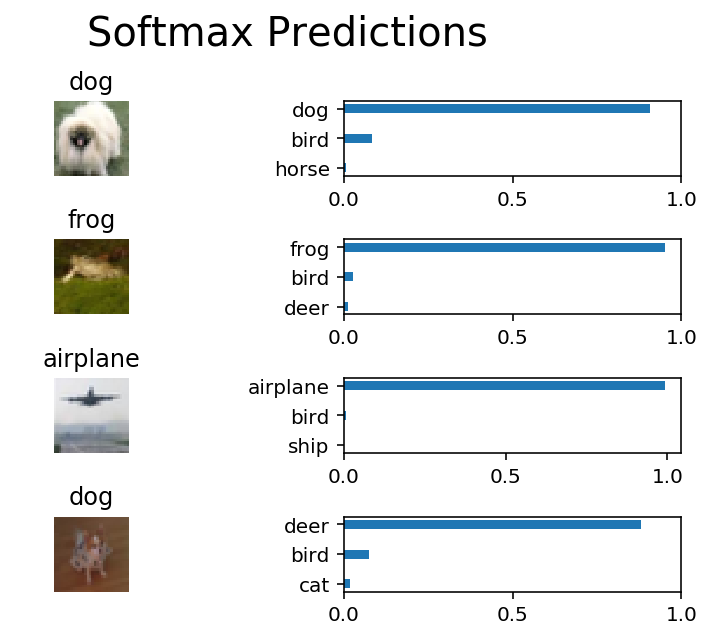

In [51]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.